In [1]:
# nama anggota kelompok :
# Alterga agus p (17.01.53.0036)
# Bagus kurniawan adhi (17.01.53.0018)
# Ilham rizqi f (17.01.53.0002)

In [2]:
pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=5893db55702e27160fce6861d08e612e4732603f169f7968e85b7620b5b933bb
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
%matplotlib inline

In [6]:
mulai = 2107
end = 2207
array = []

for mulai in range(int(mulai), int(end)+1):
    page = requests.get("https://mydramalist.com/" + str(mulai))
    #print(page)

    ## ambil html
    html = page.content
    #print(html)

    ## ambil fungsi beautifulsoup
    scraping = BeautifulSoup(html, 'html.parser')
    #print(scraping)

    ## parse judul drama
    title = scraping.find('title')

    if title is None:
        title = "-"
    else:
        title = title.text.replace(" - MyDramaList", "").strip()

    #print(title)

    ## parse deskripsi drama
    release_date = scraping.find("li", attrs={"xitemprop":"datePublished"})

    if release_date is None:
        release_date = "-"
    else:
        release_date = release_date.text.replace("Release Date: ", "").strip()

    #print(release_date)

    ## parse rating drama
    rating = scraping.find('b', attrs={"itempropx":"ratingValue"})

    if rating is None:
        rating = "0"
    else:
        rating = rating.text.strip()

    #print(rating)
    
    array.append([int(mulai), float(rating), str(title), str(release_date)])

print(array)

[[2107, 8.5, 'Silenced (2011)', 'Sep 22, 2011'], [2108, 7.8, 'Kisaragi (2007)', 'Jun 16, 2007'], [2109, 6.0, 'Akai Tsuki (2004)', 'Feb  7, 2004'], [2110, 5.9, 'Yakuza Weapon (2011)', '-'], [2111, 7.4, 'Karaoke Terror (2003)', 'Nov 15, 2003'], [2112, 6.5, 'Goku Dou High School (2006)', 'Aired: Sep 18, 2006 - Nov  7, 2006'], [2113, 7.3, 'Kurohyo Ryu ga Gotoku Shinsho (2010)', 'Aired: Oct  5, 2010 - Dec 21, 2010'], [2114, 7.8, 'Kou Kou Kyoushi (1993)', 'Aired: Jan  8, 1993 - Mar 19, 1993'], [2115, 7.4, 'Absolute Boyfriend (2012)', 'Aired: Apr 14, 2012 - Jul  7, 2012'], [2116, 6.7, 'Bus Stop (2000)', 'Aired: Jul  1, 2000 - Sep 30, 2000'], [2117, 6.2, 'Come, Closer (2010)', 'Oct 28, 2010'], [2118, 7.5, 'Hitomi (2008)', 'Aired: Mar 31, 2008 - Sep 27, 2008'], [2119, 8.2, 'Stewardess Monogatari (1983)', 'Aired: Oct 18, 1983 - Mar 27, 1984'], [2120, 7.6, 'Aoi Tori (1997)', 'Aired: Oct 10, 1997 - Dec 19, 1997'], [2121, 6.8, 'Love Story (2001)', 'Aired: Apr 15, 2001 - Jun 24, 2001'], [2122, 7.0, 

In [7]:
# menampilkan datatype
drama_data_list = pd.DataFrame(array, columns=['drama_id', 'drama_rating', 'drama_title', 'drama_release_date'])
print(drama_data_list)

     drama_id  drama_rating  \
0        2107           8.5   
1        2108           7.8   
2        2109           6.0   
3        2110           5.9   
4        2111           7.4   
..        ...           ...   
96       2203           7.0   
97       2204           8.2   
98       2205           7.8   
99       2206           6.3   
100      2207           6.4   

                                           drama_title  \
0                                      Silenced (2011)   
1                                      Kisaragi (2007)   
2                                    Akai Tsuki (2004)   
3                                 Yakuza Weapon (2011)   
4                                Karaoke Terror (2003)   
..                                                 ...   
96                             A Reason To Live (2011)   
97                                       As One (2012)   
98   Hana yori Dango 2 (Returns) Bangai hen: Makino...   
99                                 A Confession

In [8]:
# menampilkan label informasi 
data = pd.DataFrame(drama_data_list)
data

,drama_id,drama_rating,drama_title,drama_release_date
0,2107,8.5,Silenced (2011),"Sep 22, 2011"
1,2108,7.8,Kisaragi (2007),"Jun 16, 2007"
2,2109,6.0,Akai Tsuki (2004),"Feb 7, 2004"
3,2110,5.9,Yakuza Weapon (2011),-
4,2111,7.4,Karaoke Terror (2003),"Nov 15, 2003"
...,...,...,...,...
96,2203,7.0,A Reason To Live (2011),"Oct 27, 2011"
97,2204,8.2,As One (2012),"May 3, 2012"
98,2205,7.8,Hana yori Dango 2 (Returns) Bangai hen: Makino...,-
99,2206,6.3,A Confession (2010),"Aug 20, 2010"


In [9]:
# menampilkan label id dan penilaian
data = data.drop(['drama_title', 'drama_release_date'], axis = 1)
data.head()

,drama_id,drama_rating
0,2107,8.5
1,2108,7.8
2,2109,6.0
3,2110,5.9
4,2111,7.4


In [10]:
data_x = data.iloc[:, 0:2]
data_x.head()

,drama_id,drama_rating
0,2107,8.5
1,2108,7.8
2,2109,6.0
3,2110,5.9
4,2111,7.4


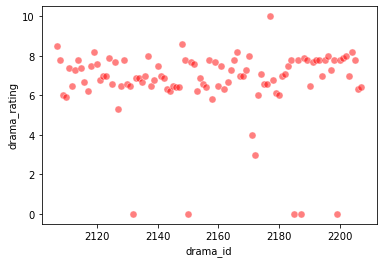

In [11]:
sns.scatterplot(x="drama_id", y="drama_rating", data=data, s=50, color="red", alpha = 0.5)

In [12]:
x_array = np.array(data_x)
print(x_array)

[[2107.     8.5]
 [2108.     7.8]
 [2109.     6. ]
 [2110.     5.9]
 [2111.     7.4]
 [2112.     6.5]
 [2113.     7.3]
 [2114.     7.8]
 [2115.     7.4]
 [2116.     6.7]
 [2117.     6.2]
 [2118.     7.5]
 [2119.     8.2]
 [2120.     7.6]
 [2121.     6.8]
 [2122.     7. ]
 [2123.     7. ]
 [2124.     7.9]
 [2125.     6.6]
 [2126.     7.7]
 [2127.     5.3]
 [2128.     6.5]
 [2129.     7.8]
 [2130.     6.6]
 [2131.     6.5]
 [2132.     0. ]
 [2133.     6.9]
 [2134.     6.9]
 [2135.     6.7]
 [2136.     7. ]
 [2137.     8. ]
 [2138.     6.5]
 [2139.     6.8]
 [2140.     7.5]
 [2141.     7. ]
 [2142.     6.9]
 [2143.     6.3]
 [2144.     6.2]
 [2145.     6.5]
 [2146.     6.4]
 [2147.     6.4]
 [2148.     8.6]
 [2149.     7.8]
 [2150.     0. ]
 [2151.     7.7]
 [2152.     7.6]
 [2153.     6.2]
 [2154.     6.9]
 [2155.     6.6]
 [2156.     6.4]
 [2157.     7.8]
 [2158.     5.8]
 [2159.     7.7]
 [2160.     6.5]
 [2161.     7.5]
 [2162.     6.3]
 [2163.     6.7]
 [2164.     7.3]
 [2165.     7.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.  , 0.85],
       [0.01, 0.78],
       [0.02, 0.6 ],
       [0.03, 0.59],
       [0.04, 0.74],
       [0.05, 0.65],
       [0.06, 0.73],
       [0.07, 0.78],
       [0.08, 0.74],
       [0.09, 0.67],
       [0.1 , 0.62],
       [0.11, 0.75],
       [0.12, 0.82],
       [0.13, 0.76],
       [0.14, 0.68],
       [0.15, 0.7 ],
       [0.16, 0.7 ],
       [0.17, 0.79],
       [0.18, 0.66],
       [0.19, 0.77],
       [0.2 , 0.53],
       [0.21, 0.65],
       [0.22, 0.78],
       [0.23, 0.66],
       [0.24, 0.65],
       [0.25, 0.  ],
       [0.26, 0.69],
       [0.27, 0.69],
       [0.28, 0.67],
       [0.29, 0.7 ],
       [0.3 , 0.8 ],
       [0.31, 0.65],
       [0.32, 0.68],
       [0.33, 0.75],
       [0.34, 0.7 ],
       [0.35, 0.69],
       [0.36, 0.63],
       [0.37, 0.62],
       [0.38, 0.65],
       [0.39, 0.64],
       [0.4 , 0.64],
       [0.41, 0.86],
       [0.42, 0.78],
       [0.43, 0.  ],
       [0.44, 0.77],
       [0.45, 0.76],
       [0.46, 0.62],
       [0.47,

In [14]:
# untuk menghidupkan algoritma kmeans
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=123)

In [15]:
print(kmeans.cluster_centers_)

[[0.12       0.706     ]
 [0.87826087 0.76478261]
 [0.62608696 0.68      ]
 [0.63833333 0.05      ]
 [0.37791667 0.69833333]]


In [16]:
#hasil akhir label di atas
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 3 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 1 2 2 2
 2 2 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1]


In [17]:
data["cluster"] = kmeans.labels_
data.head()

,drama_id,drama_rating,cluster
0,2107,8.5,0
1,2108,7.8,0
2,2109,6.0,0
3,2110,5.9,0
4,2111,7.4,0


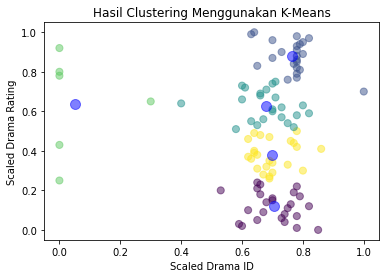

In [18]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 50,
c = data.cluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s=100, alpha=0.5);plt.title("Hasil Clustering Menggunakan K-Means")
plt.xlabel("Scaled Drama ID")
plt.ylabel("Scaled Drama Rating")
plt.show()